In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Lendo arquivos

In [127]:
x = np.load('Ex3X.npy')
y = np.load('Ex3y.npy')

x = np.hstack([np.ones([x.shape[0],1]), x]) # add coluna bias 1 para o x

# 1 batch gradient descent

In [128]:
num_iters = 100
initial_thetas = [[0], [0], [0]]

def batch_gradient_descent(x, y, thetas, ln, iterations):
    
    thetas_hist = np.zeros((iterations, 3))
    errors = np.zeros(iterations)
    for i in range(iterations):
        n = len(y)
        
        y_pred = np.dot(x, thetas) # prediz todos Ys baseado no X e nos thetas
        # Como a derivada da função de custo para cada direção(cada teta) é exatamente
        # o x1 e x2 associados a esses thetas, podemos simplesmente usar uma multiplicação de vetores
        thetas = thetas - ((ln*(x.transpose().dot(y_pred - y)))/n)
        
        thetas_hist[i,:] = thetas.transpose() #Salva os thetas encontrados nessa iteração
        
        #Calcula erro
        new_y_pred = np.dot(x, thetas)
        errors[i] = np.sum((new_y_pred - y) ** 2) / n
    print("Valores para os thetas: ", thetas.T)
    
    fig=plt.figure(figsize=(16, 3))
    fig.add_subplot(1, 3, 1)
    plt.plot(range(iterations), errors, label="Erro Batch")
    plt.legend()
    fig.add_subplot(1, 3, 2)
    plt.plot(range(iterations), thetas_hist[:,1], label="Theta 1")
    plt.legend()
    fig.add_subplot(1, 3, 3)
    
    plt.plot(range(iterations), thetas_hist[:,2], label="Theta 2")
    plt.legend()
    plt.figure()



Valores para os thetas:  [[22.14100132 10.52026493 10.93371319]]


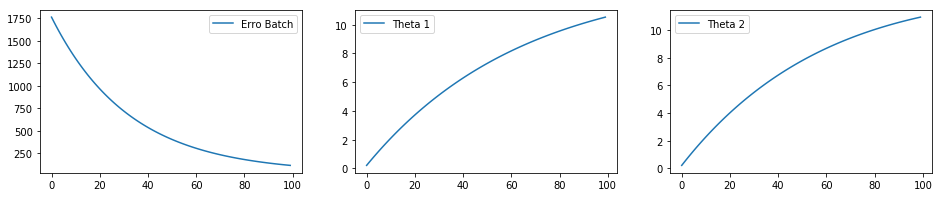

<Figure size 432x288 with 0 Axes>

In [129]:
batch_gradient_descent(x, y, initial_thetas, 0.01, num_iters)

Valores para os thetas:  [[3.95185363 1.90643513 2.07510572]]


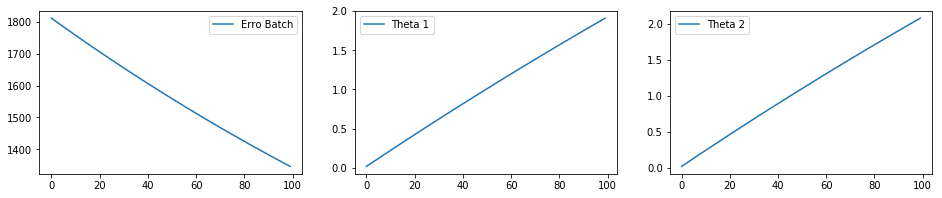

<Figure size 432x288 with 0 Axes>

In [130]:
batch_gradient_descent(x, y, initial_thetas, 0.001, num_iters)

Valores para os thetas:  [[0.21194166 0.10237638 0.11187494]]


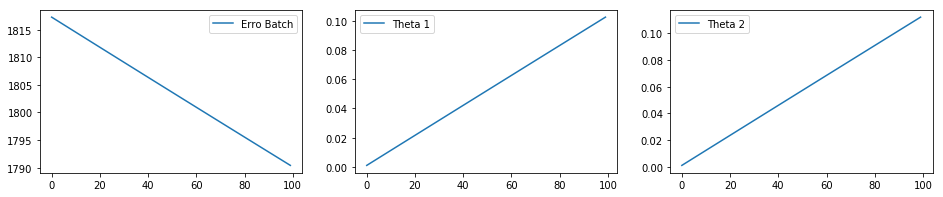

<Figure size 432x288 with 0 Axes>

In [131]:
batch_gradient_descent(x, y, initial_thetas, 0.00005, num_iters)

# 2 SGD

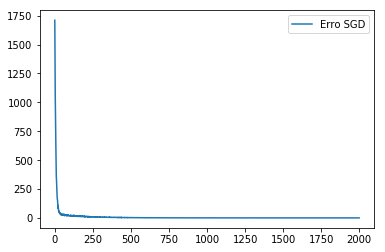

In [132]:
num_iters = 2000
initial_thetas = [[0], [0], [0]]
ln = 0.05

def SGD(x, y, thetas , ln, iterations):
    n = len(y)
    errors = np.zeros(iterations)
    
    for k in range(iterations):
        cost = 0.0
        for i in range(n):
            random_index = np.random.randint(0, n) # Indice aleatório para pegar o dado
            x1 = x[random_index,:].reshape(1, x.shape[1]) # para tranformar em um array com 1 dado de dimensão x.shape[1] 
            y1 = y[random_index].reshape(1, 1)
            
            y_pred = np.dot(x1, thetas) # array com y's preditos
            
            # Como a derivada da função de custo para cada direção(cada teta) é exatamente
            # o x1 e x2 associados a esses thetas, podemos simplesmente usar uma multiplicação de vetores
            thetas = thetas - ((ln * ( x1.transpose().dot(y_pred - y1))) / n)
           
            #Calcula erro baseados no dado
            new_y_pred = np.dot(x1, thetas) # array com novos y's preditos
            cost += np.sum((new_y_pred - y1) ** 2) / n
            
        errors[k] = cost

    plt.plot(range(iterations), errors, label="Erro SGD")
    plt.legend()
        
SGD(x, y, initial_thetas, ln, num_iters)     

# 3 Mini batch GD

In [133]:
num_iters = 200
initial_thetas = [[0], [0], [0]]
ln = 0.05
batch_size = 10

def mini_batch_GD(x, y, thetas , ln, iterations, batch_size):
    n = len(y)
    errors = np.zeros(iterations)
    
    for k in range(iterations):
        indexes = np.random.permutation(n)
        
        mixed_x = x[indexes]
        mixed_y = y[indexes]
        
        cost = 0.0
        for i in range(0, n, batch_size):
            random_index = np.random.randint(0, n) # Indice aleatório para pegar o dado
            x1 = mixed_x[i:i+batch_size] # para tranformar em um array com 1 dado de dimensão x.shape[1] 
            y1 = mixed_y[i:i+batch_size]
            
            y_pred = np.dot(x1, thetas) # array com y's preditos
            
            # Como a derivada da função de custo para cada direção(cada teta) é exatamente
            # o x1 e x2 associados a esses thetas, podemos simplesmente usar uma multiplicação de vetores
            thetas = thetas - ((ln * ( x1.transpose().dot(y_pred - y1))) / n)
           
            #Calcula erro baseados no dado
            new_y_pred = np.dot(x1, thetas) # array com novos y's preditos
            cost += np.sum((new_y_pred - y1) ** 2) / n
            
        errors[k]  = cost

    plt.plot(range(iterations), errors, label="Erro Mini Batch")
    plt.legend()

# SGD x Mini Batch
### Como SGD pega um dado aleátório o leve ruído visto no gráfico mostra que a direção pode não ser a melhor, apesar de convergir, ele pode demorar um pouco mais de tempo.

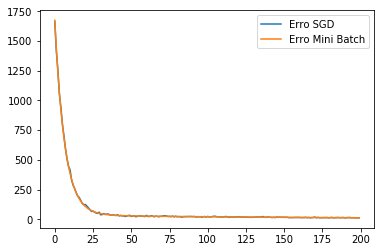

In [134]:
SGD(x, y, initial_thetas, ln, num_iters)

mini_batch_GD(x, y, initial_thetas, ln, num_iters, batch_size)

Valores para os thetas:  [[27.37009342 12.72421454 12.36778049]]
Valores para os thetas:  [27.37009341910231, 12.724214543662251, 12.367780492342645]


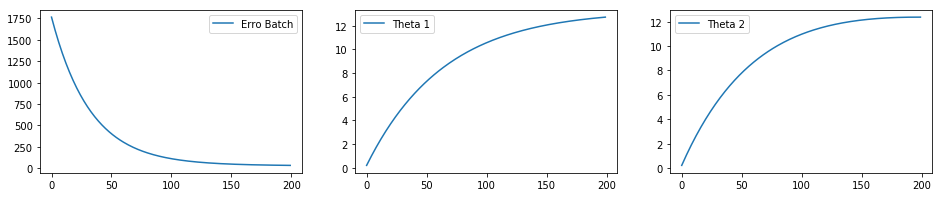

<Figure size 432x288 with 0 Axes>

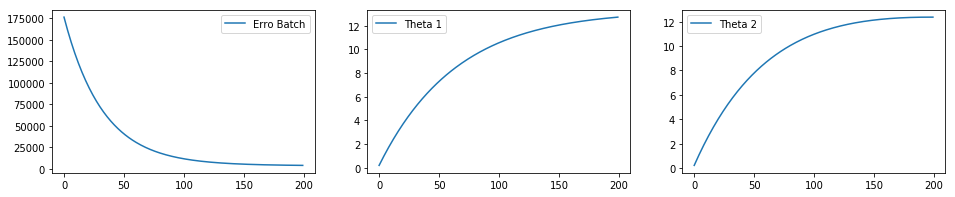

<Figure size 432x288 with 0 Axes>

In [135]:
def test(x, y, thetas, ln, iterations):
    
    t0, t1, t2 = thetas
   
    thetas_hist = np.zeros((iterations, 3))
    errors = np.zeros(iterations)
    for i in range(iterations):
        n = len(y)
        
        y_pred = np.dot(x, [[t0],[t1], [t2]]) # prediz todos Ys baseado no X e nos thetas

        t0 = t0 - ln * (1/n) * ((y_pred - y)).sum()
        t1 = t1 - ln * (1/n) * ((y_pred - y).T.dot(x[:,1])).sum()
        t2 = t2 - ln * (1/n) * ((y_pred - y).T.dot(x[:,2])).sum()
        
        thetas_hist[i,:] = [t0, t1, t2] #Salva os thetas encontrados nessa iteração
        
        #Calcula erro
        new_y_pred = np.dot(x, [t0, t1, t2])
        errors[i] = np.sum((new_y_pred - y) ** 2) / n
    print("Valores para os thetas: ", [t0, t1, t2])
    
    fig=plt.figure(figsize=(16, 3))
    fig.add_subplot(1, 3, 1)
    plt.plot(range(iterations), errors, label="Erro Batch")
    plt.legend()
    fig.add_subplot(1, 3, 2)
    plt.plot(range(iterations), thetas_hist[:,1], label="Theta 1")
    plt.legend()
    fig.add_subplot(1, 3, 3)
    plt.plot(range(iterations), thetas_hist[:,2], label="Theta 2")
    plt.legend()
    plt.figure()

batch_gradient_descent(x, y, [[0], [0], [0]], 0.01, num_iters)
test(x, y, [0, 0, 0], 0.01, num_iters)
